In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(
    style="whitegrid",
    font_scale=1.0,
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False
    }
)

purple_palette = [
    "#DEC2FF",
    "#9671C9",
    "#7C3AED",
    "#A855F7",
    "#EC4899",
    "#752AAD",
    "#7518F5",
    "#7B26FF",
]

single_purple = "#7C3AED"

from matplotlib.colors import LinearSegmentedColormap
purple_cmap = LinearSegmentedColormap.from_list(
    "purple_cmap",
    ["#FDF2FF", "#C4B5FD", "#7C3AED", "#4C1D95"]
)

In [3]:
df = pd.read_csv("Unwomen-security-peace.csv")
df.head(15)

,Base Dataset,Indicator Ref,SERIES Code,SERIES Description,REF_AREA Code,Area Type,REF_AREA Description,TIME_PERIOD,TIME_DETAIL,OBS_VALUE,UNIT_MEASURE Code,UNIT_MEASURE Description,Sex code,SOURCE_DETAIL,Sex
0,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM1,UN field mission,"UNOWAS, West Africa and the Sahel",2017,"31 December, 2017",4,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
1,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM10,UN field mission,"UNAMA, Afghanistan",2017,"31 December, 2017",11,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
2,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM11,UN field mission,"UNSCO, Middle East Peace Process",2017,"31 December, 2017",1,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
3,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM12,UN field mission,UN Verification Mission in Colombia,2017,"31 December, 2017",6,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
4,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM14,UN field mission,Special Envoy Syria,2017,"31 December, 2017",3,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
5,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM18,UN field mission,"UNTSO, Middle East",2017,"31 December, 2017",3,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
6,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM2,UN field mission,"UNIOGBIS, Guinea-Bissau",2017,"31 December, 2017",3,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
7,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM20,UN field mission,"UNFICYP, Cyprus",2017,"31 December, 2017",4,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
8,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM21,UN field mission,"UNDOF, Golan",2017,"31 December, 2017",1,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
9,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM22,UN field mission,"UNIFIL, Lebanon",2017,"31 December, 2017",4,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Base Dataset              26 non-null     object
 1   Indicator Ref             26 non-null     object
 2   SERIES Code               26 non-null     object
 3   SERIES Description        26 non-null     object
 4   REF_AREA Code             26 non-null     object
 5   Area Type                 26 non-null     object
 6   REF_AREA Description      26 non-null     object
 7   TIME_PERIOD               26 non-null     int64 
 8   TIME_DETAIL               26 non-null     object
 9   OBS_VALUE                 26 non-null     int64 
 10  UNIT_MEASURE Code         26 non-null     object
 11  UNIT_MEASURE Description  26 non-null     object
 12  Sex code                  26 non-null     object
 13  SOURCE_DETAIL             26 non-null     object
 14  Sex                       26

In [5]:
df.isna().sum()

,0
Base Dataset,0
Indicator Ref,0
SERIES Code,0
SERIES Description,0
REF_AREA Code,0
Area Type,0
REF_AREA Description,0
TIME_PERIOD,0
TIME_DETAIL,0
OBS_VALUE,0


In [6]:
sp = df.copy()

sp = sp.rename(columns={
    "REF_AREA Code": "mission_code",
    "REF_AREA Description": "mission",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "n_women",
    "UNIT_MEASURE Description": "unit"
})

sp.info()
sp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Base Dataset        26 non-null     object
 1   Indicator Ref       26 non-null     object
 2   SERIES Code         26 non-null     object
 3   SERIES Description  26 non-null     object
 4   mission_code        26 non-null     object
 5   Area Type           26 non-null     object
 6   mission             26 non-null     object
 7   year                26 non-null     int64 
 8   TIME_DETAIL         26 non-null     object
 9   n_women             26 non-null     int64 
 10  UNIT_MEASURE Code   26 non-null     object
 11  unit                26 non-null     object
 12  Sex code            26 non-null     object
 13  SOURCE_DETAIL       26 non-null     object
 14  Sex                 26 non-null     object
dtypes: int64(2), object(13)
memory usage: 3.2+ KB


,Base Dataset,Indicator Ref,SERIES Code,SERIES Description,mission_code,Area Type,mission,year,TIME_DETAIL,n_women,UNIT_MEASURE Code,unit,Sex code,SOURCE_DETAIL,Sex
0,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM1,UN field mission,"UNOWAS, West Africa and the Sahel",2017,"31 December, 2017",4,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
1,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM10,UN field mission,"UNAMA, Afghanistan",2017,"31 December, 2017",11,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
2,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM11,UN field mission,"UNSCO, Middle East Peace Process",2017,"31 December, 2017",1,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
3,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM12,UN field mission,UN Verification Mission in Colombia,2017,"31 December, 2017",6,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female
4,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM14,UN field mission,Special Envoy Syria,2017,"31 December, 2017",3,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female


In [7]:
sp["n_women"].describe()

,n_women
count,26.000000
mean,6.192308
std,5.314277
min,1.000000
25%,2.250000
50%,4.000000
75%,9.750000
max,21.000000


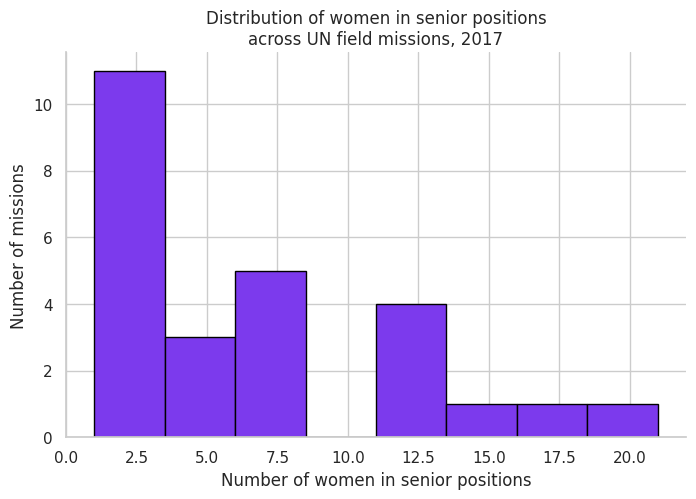

In [8]:
plt.figure(figsize=(8,5))
plt.hist(sp["n_women"], bins=8, edgecolor="black", color=single_purple)
plt.title("Distribution of women in senior positions\nacross UN field missions, 2017")
plt.xlabel("Number of women in senior positions")
plt.ylabel("Number of missions")
plt.grid(True)
plt.show()

/tmp/ipython-input-2261175577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2261175577.py:7: UserWarning: 
The palette list has fewer values (8) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


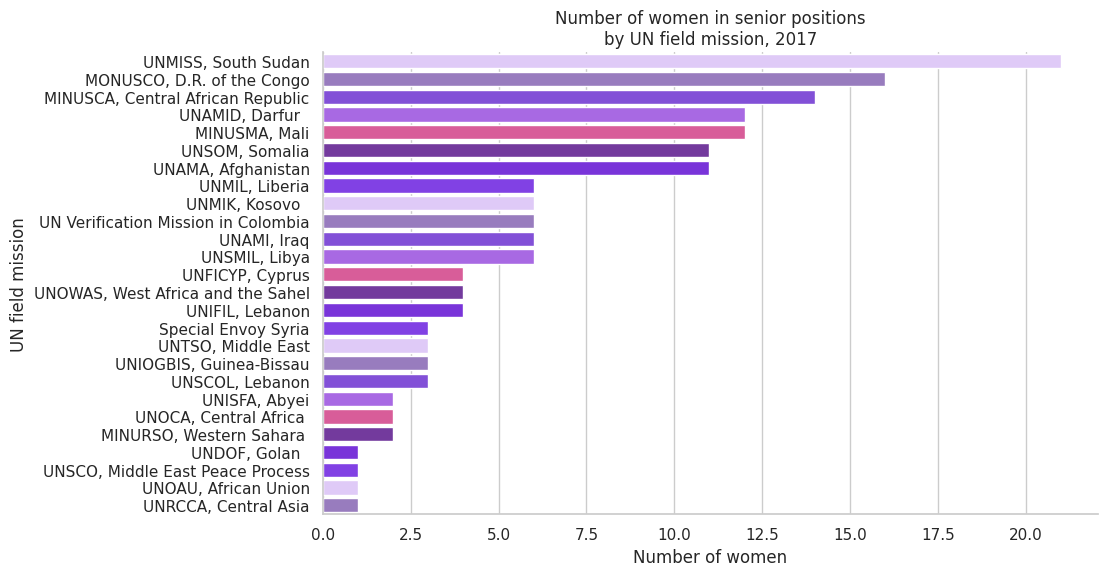

In [9]:
missions_ranked = (
    sp[["mission", "n_women"]]
    .sort_values("n_women", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=missions_ranked,
    x="n_women",
    y="mission",
    palette=purple_palette
)
plt.title("Number of women in senior positions\nby UN field mission, 2017")
plt.xlabel("Number of women")
plt.ylabel("UN field mission")
plt.grid(True, axis="x")
plt.show()

In [10]:
total_women = sp["n_women"].sum()

sp_share = (
    sp.assign(share_pct=lambda x: x["n_women"] / total_women * 100)
    .sort_values("share_pct", ascending=False)
)

sp_share.head()

,Base Dataset,Indicator Ref,SERIES Code,SERIES Description,mission_code,Area Type,mission,year,TIME_DETAIL,n_women,UNIT_MEASURE Code,unit,Sex code,SOURCE_DETAIL,Sex,share_pct
17,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM30,UN field mission,"UNMISS, South Sudan",2017,"31 December, 2017",21,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female,13.043478
14,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM28,UN field mission,"MONUSCO, D.R. of the Congo",2017,"31 December, 2017",16,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female,9.937888
19,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM32,UN field mission,"MINUSCA, Central African Republic",2017,"31 December, 2017",14,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female,8.695652
13,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM27,UN field mission,"UNAMID, Darfur",2017,"31 December, 2017",12,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female,7.453416
18,WPS,The UN system’s commitment to WPS and implemen...,WPS_9_3,"Number of women in senior positions, by UN fie...",FM31,UN field mission,"MINUSMA, Mali",2017,"31 December, 2017",12,Number,NUMBER,FEMALE,(Former) UN Department of Field Support,Female,7.453416


/tmp/ipython-input-2769079951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2769079951.py:2: UserWarning: 
The palette list has fewer values (8) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


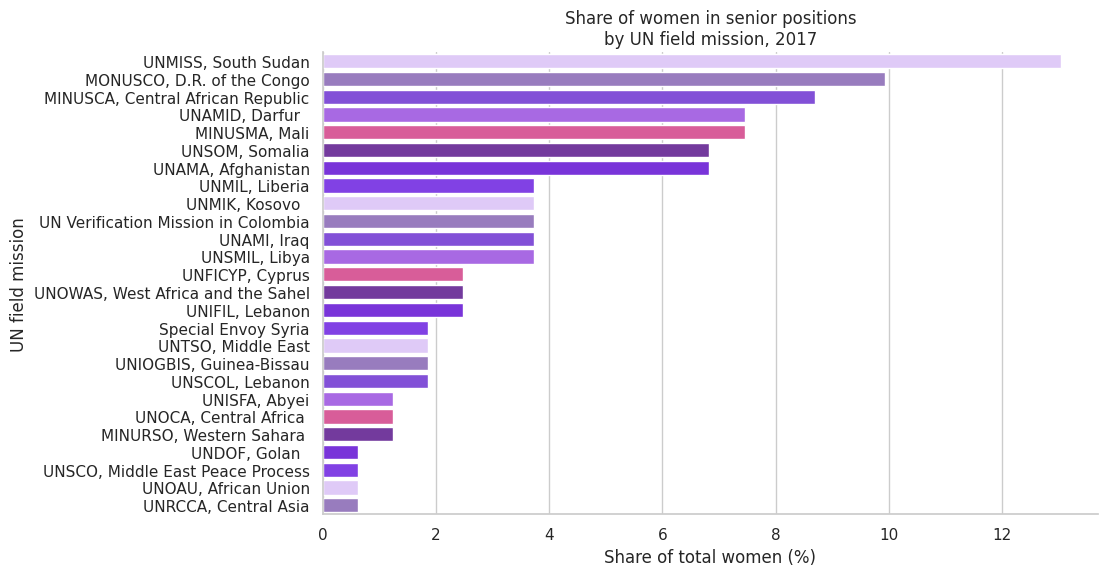

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=sp_share,
    x="share_pct",
    y="mission",
    palette=purple_palette
)
plt.title("Share of women in senior positions\nby UN field mission, 2017")
plt.xlabel("Share of total women (%)")
plt.ylabel("UN field mission")
plt.grid(True, axis="x")
plt.show()

In [12]:
q1, q2, q3 = sp["n_women"].quantile([0.25, 0.5, 0.75])

def level(n):
    if n <= q1:
        return "Low"
    elif n <= q3:
        return "Medium"
    else:
        return "High"

sp["representation_level"] = sp["n_women"].apply(level)

sp["representation_level"].value_counts()

,count
representation_level,
Medium,12
High,7
Low,7


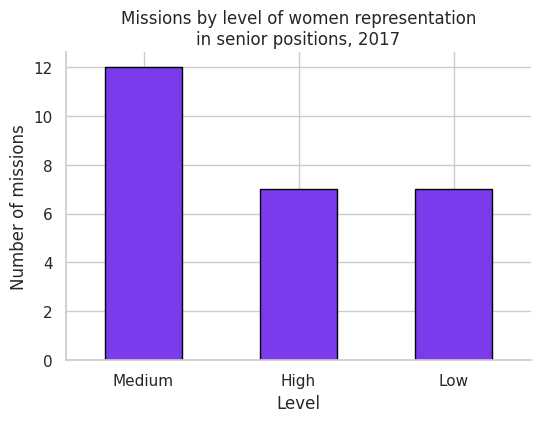

In [14]:
plt.figure(figsize=(6,4))
sp["representation_level"].value_counts().plot(kind="bar", edgecolor="black", color=single_purple)
plt.title("Missions by level of women representation\nin senior positions, 2017")
plt.xlabel("Level")
plt.ylabel("Number of missions")
plt.xticks(rotation=0)
plt.grid(True, axis="y")
plt.show()